In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils import resample

In [5]:
df = pd.read_csv("C:/Users/bybha/Downloads/IRIS.csv")


In [6]:
print("First 5 rows of the dataset:")
print(df.head())
print("\nDataset Summary:")
print(df.describe())
print("\nClass distribution:")
print(df['species'].value_counts())

First 5 rows of the dataset:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Dataset Summary:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

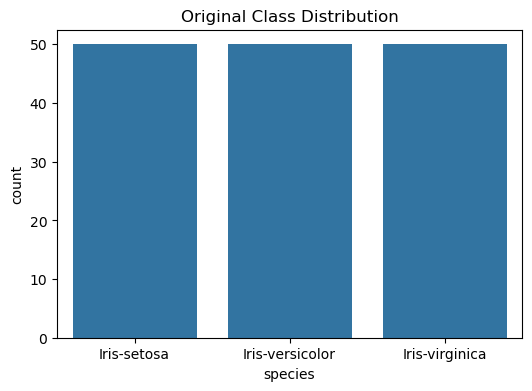

In [7]:
plt.figure(figsize=(6,4))
sns.countplot(x='species', data=df)
plt.title("Original Class Distribution")
plt.show()

In [8]:
le = LabelEncoder()
df['species'] = le.fit_transform(df['species']) 

In [9]:
min_class_count = df['species'].value_counts().min()
print(f"\nUndersampling to {min_class_count} samples per class.")


Undersampling to 50 samples per class.


In [10]:
df_balanced = pd.concat([
    resample(df[df['species'] == label], 
             replace=False, 
             n_samples=min_class_count, 
             random_state=42)
    for label in df['species'].unique()
])


In [11]:
print("\nBalanced class distribution:")
print(df_balanced['species'].value_counts())


Balanced class distribution:
species
0    50
1    50
2    50
Name: count, dtype: int64


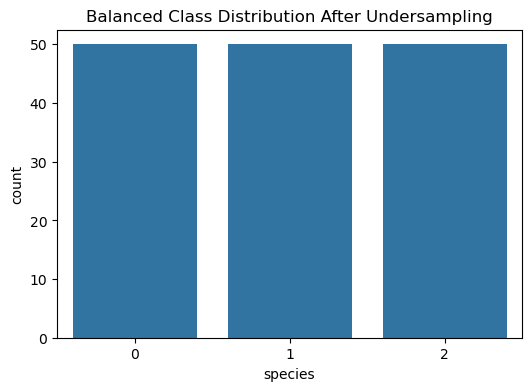

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(x='species', data=df_balanced)
plt.title("Balanced Class Distribution After Undersampling")
plt.show()

In [13]:
X = df_balanced.drop('species', axis=1)
y = df_balanced['species']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42)

In [15]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
y_pred = model.predict(X_test)


In [17]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


In [18]:
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Accuracy Score:
0.9666666666666667


In [19]:

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [20]:
importances = model.feature_importances_
features = X.columns

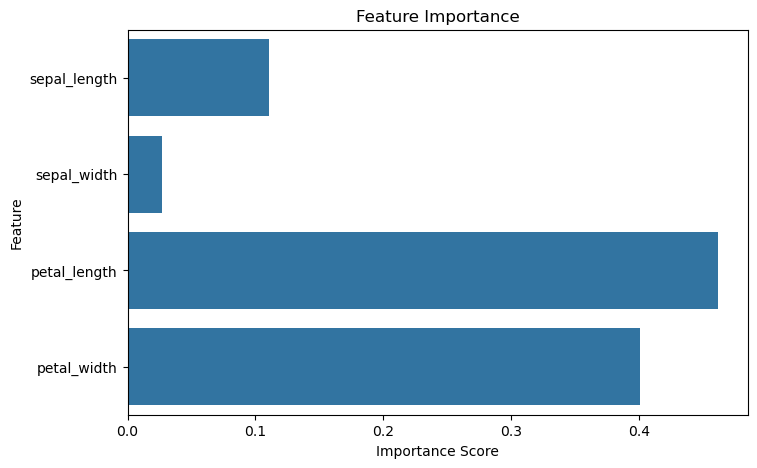

In [21]:
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()